# Importing our Libraries

In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline



# Reading the data and checking it

In [74]:
df = pd.read_csv("Clustering_kmeans (2).csv")
df

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [75]:
df.shape

(500, 2)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [77]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

# `Scatter` plot between the Weights and the Heights

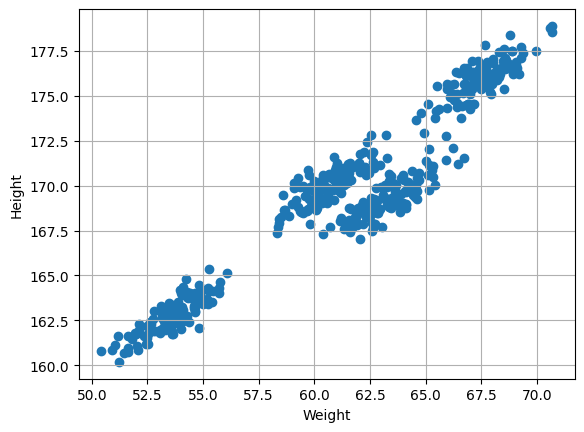

In [78]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid()

# `Histogram` with the Weight and Height counts 

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

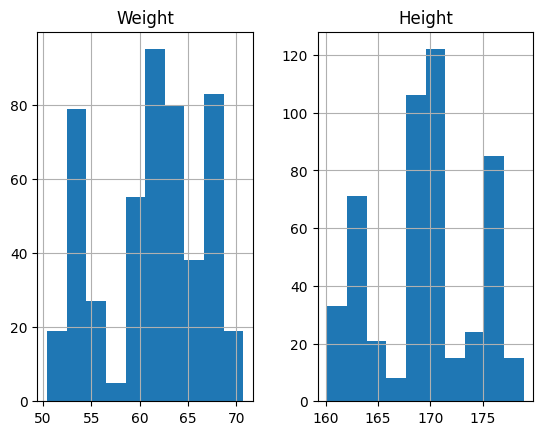

In [79]:
df.hist()

#  Defining the KMeans class from scratch 

In [80]:
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, x):
        # Initialize centroids randomly
        self.centroids = x[np.random.choice(x.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(x)
            
            # Update centroids
            new_centroids = self._update_centroids(x, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def _assign_labels(self, x):
        # Compute distances from each data point to centroids
        distances = np.linalg.norm(x[:, np.newaxis] - self.centroids, axis=2)
        
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, x, labels):
        new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids
    
    def inertia(self, X):
        labels = self._assign_labels(X)
        return sum(np.linalg.norm(X[labels == i] - self.centroids[i])**2 for i in range(self.n_clusters))

# `Elbow Method` to determine the optimal number of clusters

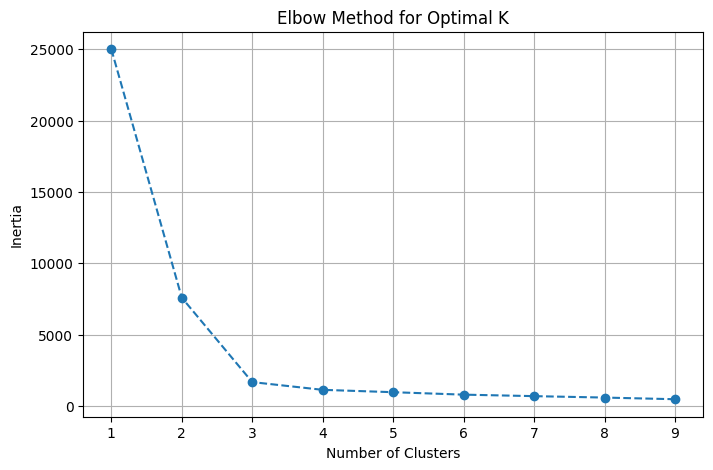

In [81]:
x = df[['Weight', 'Height']].values
distortion = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortion.append(kmeans.inertia(x))

plt.figure(figsize=(8, 5))
plt.plot(k_values, distortion, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

# Applying KMeans and Plotting the clusters

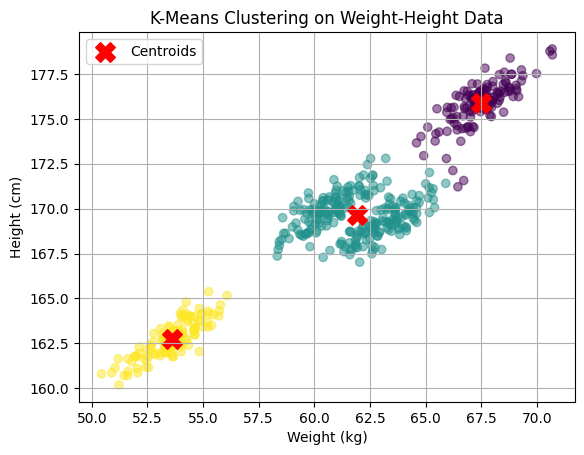

In [82]:
x = df[['Weight', 'Height']].values
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
labels = kmeans._assign_labels(x)

plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('K-Means Clustering on Weight-Height Data')
plt.legend()
plt.grid()
plt.show()


# Defining each cluster and it's personas (min,max,mean,std)

In [83]:
df['Cluster'] = labels
df

,Weight,Height,Cluster
0,67.062924,176.086355,0
1,68.804094,178.388669,0
2,60.930863,170.284496,1
3,59.733843,168.691992,1
4,65.431230,173.763679,0
...,...,...,...
495,59.976983,169.679741,1
496,66.423814,174.625574,0
497,53.604698,161.919208,2
498,50.433644,160.794875,2


In [84]:
cluster1 = df[df['Cluster'] == 0 ]
cluster1

,Weight,Height,Cluster
0,67.062924,176.086355,0
1,68.804094,178.388669,0
4,65.431230,173.763679,0
11,68.554857,176.473747,0
16,67.163841,176.337069,0
...,...,...,...
467,67.392113,176.457490,0
469,67.561705,176.047309,0
471,67.020706,174.290696,0
488,66.373248,176.309816,0


In [85]:
cluster1.describe()

,Weight,Height,Cluster
count,129.000000,129.000000,129.0
mean,67.480409,175.860175,0.0
std,1.144214,1.262885,0.0
min,64.594025,171.216489,0.0
25%,66.810446,175.372059,0.0
50%,67.468502,176.029216,0.0
75%,68.227831,176.549045,0.0
max,70.700456,178.894770,0.0


In [86]:
cluster2 = df[df['Cluster'] == 1 ]
cluster2

,Weight,Height,Cluster
2,60.930863,170.284496,1
3,59.733843,168.691992,1
5,61.577160,168.091751,1
6,63.341866,170.642516,1
7,61.041643,170.096682,1
...,...,...,...
492,62.311154,170.593457,1
493,61.848894,168.260194,1
494,62.200362,167.889268,1
495,59.976983,169.679741,1


In [87]:
cluster2.describe()

,Weight,Height,Cluster
count,246.000000,246.000000,246.0
mean,61.911015,169.619227,1.0
std,1.719048,1.100377,0.0
min,58.337461,167.018251,1.0
25%,60.599028,168.786484,1.0
50%,61.922188,169.717236,1.0
75%,63.271917,170.393578,1.0
max,65.906286,172.799210,1.0


In [88]:
cluster3 = df[df['Cluster'] == 2 ]
cluster3

,Weight,Height,Cluster
9,53.407860,162.756843,2
13,53.446017,162.915167,2
18,53.964764,162.490554,2
23,53.551393,162.256949,2
25,54.830925,163.769737,2
...,...,...,...
483,53.578495,162.430613,2
487,54.069163,162.998875,2
491,55.223039,163.405498,2
497,53.604698,161.919208,2


In [89]:
cluster3.describe()

,Weight,Height,Cluster
count,125.000000,125.000000,125.0
mean,53.600298,162.764782,2.0
std,1.122123,1.018100,0.0
min,50.433644,160.182164,2.0
25%,53.073473,162.043844,2.0
50%,53.641564,162.769970,2.0
75%,54.301359,163.405498,2.0
max,56.078781,165.375646,2.0
